## Importing the necessary libraries

In [0]:
#Importing all libraries
import pandas as pd
import nltk
import re
import numpy as np
import fasttext
import graphviz
from graphviz import render
from collections import Counter
import gensim.models.word2vec as w2v

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
#Initializing the stop word list
stop_words = set(nltk.corpus.stopwords.words('english')) 

In [0]:
# Importing libraries for WordCloud visualization
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

## Adding the stopwords words that are not in the nltk stopwords

In [0]:
stop_words.add('yes')
stop_words.add('yeah')
stop_words.add('would')
stop_words.add('could')
stop_words.add('okay')
stop_words.add('also')
stop_words.add('ok')
stop_words.add('oh')
stop_words.add('th')
stop_words.add('alright')
stop_words.add('without')
stop_words.add('might')
stop_words.add('many')
stop_words.add('much')
stop_words.add('may')
stop_words.add('per')
stop_words.add('otherwise')

In [0]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'alright',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'could',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'many',
 'may',
 'me',
 'might',
 'mightn',
 "mightn't",
 'more',
 'most',
 'much',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'oh',
 'ok',
 'okay',
 'on',
 'on

## Intialising the Lemmatizer

In [0]:
wn=nltk.WordNetLemmatizer()

## Preparing the training data

In [0]:
train_df = pd.DataFrame(columns=['Data','Label'])

In [0]:
file=files.upload()
file = open("dataForFasttext.txt", "r")

for each in file:
    if(each.startswith('__label__')):
        label=each.partition(' ')[0]
        data=each.partition(' ')[2]
        train_df=train_df.append({'Data': data, 'Label': label}, ignore_index=True)    

In [0]:
print(train_df)

                                                 Data          Label
0   How many meals would most of the men or women ...    __label__sm
1       What do they generally eat in these meals? \n    __label__sm
2   Any differences in food for children or the il...    __label__sm
3          Do you think that you eat healthy food? \n    __label__sm
4   Do you think that others might be considering ...    __label__sm
5   What is being fat, thin or proper measured bod...    __label__sm
6   What activities do every family member do in a...    __label__sm
7   Which members of the family would do physical ...    __label__sm
8   Can you describe the kind of exercise that the...    __label__sm
9   How many people in the community are conscious...    __label__sm
10  What is the average size of a family? Generati...    __label__ss
11  Who in a family would be most aware if one has...    __label__ss
12  Who in a family would be most smart or wise? W...    __label__ss
13     Who in a family do get care

## Finding the count of records of each labels

In [0]:
train_df['Label'].value_counts()

__label__cd      16
__label__ss      11
__label__sm      10
__label__pov     10
__label__job      9
__label__tool     5
__label__comm     5
Name: Label, dtype: int64

## Function for  data preprocessing

In [0]:
def preprocess(text):
    text=re.sub("\\(.*?\\)","",text)
    word_tokens = nltk.word_tokenize(text) 
    pos=nltk.pos_tag(word_tokens)
    j=0
    for i,k in zip(pos[0:], pos[1:]):
        if ((i[1]=='NNP') & (k[1]=='NNP')):
            word_tokens[j]=i[0]+'-'
        j=j+1   
    text=' '.join(word_tokens)
    text=re.sub('- ','-',text)
    text=re.sub("-","",text)
    text = re.sub("[^a-zA-Z]"," ", text)
    word_tokens= nltk.word_tokenize(text)
    filtered_sentence = [] 
    for each in word_tokens:
        if(each.lower() not in stop_words):
            filtered_sentence.append(each)         
    text=[]        
    for word in filtered_sentence:
        if(word.endswith('ss')==False):
            temp=wn.lemmatize(word.lower())
            if(len(temp)>1):
                text.append(temp)
        else:
            text.append(word)
    text=' '.join(text)
    return text

## Preprocess the training data

In [0]:
train_df['Data_clean']=train_df['Data'].apply(preprocess)

In [0]:
print(train_df['Data_clean'].tail())

107          language know read write language use phone
108    electronic gadget device typically owned phone...
109         socializing individual family often occasion
110    people communicate family friend worry kind wo...
111          language know read write language use phone
Name: Data_clean, dtype: object


## Shuffling the data

In [0]:
FinalDf=train_df.sample(n=train_df.shape[0])

In [0]:
print(FinalDf.tail())

                                                 Data          Label  \
99  Interactive demo of diabetes tools:  glucose m...  __label__tool   
24  Are there particular time of the day or occasi...    __label__cd   
72  Do you think that others might be considering ...    __label__sm   
69  What should they do to make you follow their a...    __label__ss   
66  Who besides or outside the family are people i...    __label__ss   

                                           Data_clean  
99  interactive demo diabetes tool glucose monitor...  
24  particular time day occasion general find diff...  
72    think others might considering foody care taste  
69                                 make follow advice  
66            besides outside family people important  


## Writing the training data into a txt file

In [0]:
import csv
FinalDf[['Label','Data_clean']].to_csv('dataForClassiffn.txt', header=None, index=None, sep=' ', mode='a',quoting=csv.QUOTE_NONE, escapechar=' ')

## Build the fasttext model and train it.

In [0]:
#files.upload()
model = fasttext.train_supervised("dataForClassiffn.txt", lr=0.01, dim=20, epoch=500,  word_ngrams=2, loss='hs')
model.save_model("model.bin")

## Preparing our interview data

In [0]:
data=pd.read_csv('CleanData.csv')
#Removing null values
data=data.fillna('')
data.head(10)

,Stakeholder,Asked by,Question,Answered by,Answer
0,Anganwadi1,,,Lady 1,We have 26 to 27 anganwadis from one corner to...
1,Anganwadi1,Interviewer,That means there is one anganwadi for every 20...,Lady 1,Yes.
2,Anganwadi1,Interviewer,That means there are 26000 people here.,Lady 1,"Yes. That much is for sure, from one corner to..."
3,Anganwadi1,Interviewer,That means this is a huge community.,Lady 1,There is a lot in the interiors. How much ever...
4,Anganwadi1,Interviewer,"When we come from Gandhi Ashram, we have seen ...",Lady 1,There is still a lot in the interiors. Till Ra...
5,Anganwadi1,Interviewer,That means it covers the entire Vadaj Village ...,Lady 1,"No, that area is not included. It is there, bu..."
6,Anganwadi1,Interviewer,"Oh, that means lot of population is there.",Lady 1,"Yes, there is lot of population."
7,Anganwadi1,Interviewer,How many kids come here generally? What is you...,Lady 1,"At morning when we come, kids of 3 to 6 years ..."
8,Anganwadi1,Interviewer,How many kids are coming?,Lady 1,In my anganwadi regularly 35 kids are sitting.
9,Anganwadi1,Interviewer,Do you talk to their parents?,Lady 1,I talk to their parents every day because our ...


## Combining both question and answer

In [0]:
data['Combined']=data['Question']+' '+data['Answer']

## Preprocess the interview data

In [0]:
#Preprocess the combined column
data['Data_clean']=data['Combined'].apply(preprocess)

In [0]:
#Preprocess the answer
data['Answer_clean']=data['Answer'].apply(preprocess)

In [0]:
data['Data_clean']

0                    anganwadis one corner another corner
1                          mean one anganwadi every house
2              mean people sure one corner another corner
3       mean huge community lot interior ever populati...
4       come gandhiashram seen near bridge still lot i...
5       mean cover entire vadajvillage side kitli area...
6                      mean lot population lot population
7       kid come generally schedule whole day work mor...
8              kid coming anganwadi regularly kid sitting
9       talk parent talk parent every day timing kid c...
10      mean visit house every day talk kid coming gra...
11              said malnutritional kid around definitely
12      malnutritional like kid register age year arou...
13      malnutritional kid malnutritional kid malnutri...
14                                                       
15      reason problem mother time take care kid give ...
16                             listen whatever say listen
17      time r

In [0]:
#Taking only the records in which there is atleast 3 words after preprocessing
testdata=data[data['Data_clean'].map(lambda d: len(d.split(' '))) > 2][['Question','Answer','Data_clean','Answer_clean']]

## Convert the preprocessesed column into a list, to give it as the input to fasttext for classification

In [0]:
testdata['Data_clean'].tolist()

['anganwadis one corner another corner',
 'mean one anganwadi every house',
 'mean people sure one corner another corner',
 'mean huge community lot interior ever population interior exterior',
 'come gandhiashram seen near bridge still lot interior tillranipcrossing lot',
 'mean cover entire vadajvillage side kitli area included different ward junavadej ranipcrossroad entire belt anganwadis',
 'mean lot population lot population',
 'kid come generally schedule whole day work morning come kid year come anganwadi first give shira rab month yearold kid cook shira rab make eat kid year old come anganwadi make prayer give breakfast matrumandal monday thursday fruit along snack menu matrumandal monday saturday give breakfast giving breakfast timetable given different activity monday saturday make child activity',
 'kid coming anganwadi regularly kid sitting',
 'talk parent talk parent every day timing kid come sit leave kid visit house field visit area cover area around people way definitel

## Predict the labels

In [0]:
labels = model.predict(testdata['Data_clean'].tolist(),k=1)

In [0]:
codes=[]
for each in labels[0]:
    codes.append(each[0])

In [0]:
#Assigning the predicted labels for the respective rows
testdata['Labels']=codes

In [0]:
#Assiging the similarity value of each predicted labels
testdata['Probs']=labels[1]

## Taking the data of each predicted labels into respective dataframes

In [0]:
cd=testdata[testdata['Labels']=='__label__cd']
job=testdata[testdata['Labels']=='__label__job']
comm=testdata[testdata['Labels']=='__label__comm']
tool=testdata[testdata['Labels']=='__label__tool']
sm=testdata[testdata['Labels']=='__label__sm']
ss=testdata[testdata['Labels']=='__label__ss']
pov=testdata[testdata['Labels']=='__label__pov']

## Plotting the wordcloud for each categories

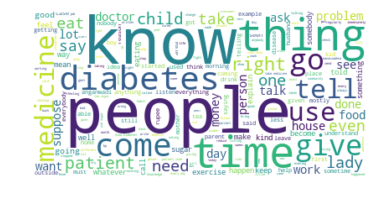

In [0]:
# Data of chronic disease (__label__cd)
text = " ".join(review for review in cd['Data_clean'])
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)
cd_keywords=Counter(text.split())
cd_keywords=a=[i for i in cd_keywords if cd_keywords[i] > 5]
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

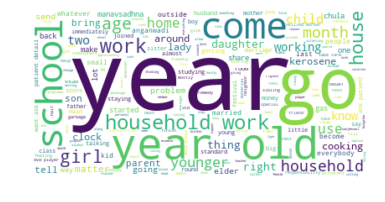

In [0]:
# # Data of poverty (__label__pov)
text = " ".join(review for review in pov['Data_clean'])
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)
pov_keywords=Counter(text.split())
pov_keywords=[i for i in pov_keywords if pov_keywords[i] >5]
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

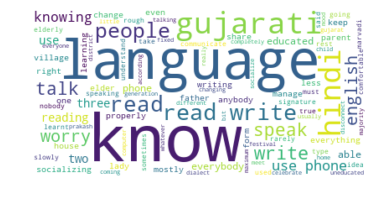

In [0]:
# Data of communication (__label__comm)
text = " ".join(review for review in comm['Data_clean'])
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)
comm_keywords=Counter(text.split())
comm_keywords=[i for i in comm_keywords if comm_keywords[i] > 5]
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

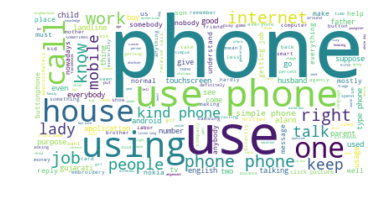

In [0]:
# Data of job and income (__label__job)
text = " ".join(review for review in job['Data_clean'])
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)
job_keywords=Counter(text.split())
job_keywords=[i for i in job_keywords if job_keywords[i] > 5]
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

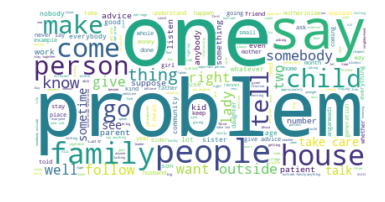

In [0]:
# Data of social support (__label__ss)
text = " ".join(review for review in ss['Data_clean'])
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)
ss_keywords=Counter(text.split())
ss_keywords=[i for i in ss_keywords if ss_keywords[i] > 5]
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

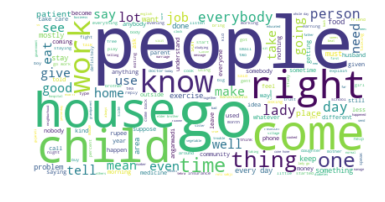

In [0]:
# Data of self management (__label__sm)
text = " ".join(review for review in sm['Data_clean'])
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)
sm_keywords=Counter(text.split())
sm_keywords=[i for i in sm_keywords if sm_keywords[i] > 5]
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Counter({'internet': 56, 'use': 47, 'phone': 38, 'glucometer': 27, 'like': 25, 'come': 22, 'using': 21, 'strip': 20, 'patient': 17, 'people': 14, 'color': 12, 'one': 11, 'need': 11, 'medicine': 10, 'right': 10, 'cost': 9, 'know': 9, 'get': 9, 'time': 8, 'application': 8, 'buy': 8, 'give': 8, 'immediately': 8, 'thing': 8, 'test': 7, 'rupee': 7, 'number': 7, 'sugar': 7, 'child': 7, 'besides': 6, 'doctor': 6, 'call': 6, 'work': 6, 'every': 6, 'make': 6, 'month': 5, 'house': 5, 'case': 5, 'example': 5, 'something': 5, 'minute': 5, 'home': 5, 'keep': 5, 'day': 5, 'must': 5, 'song': 5, 'facebook': 5, 'father': 5, 'diabetes': 4, 'thinking': 4, 'see': 4, 'seeing': 4, 'making': 4, 'whatever': 4, 'red': 4, 'ask': 4, 'done': 4, 'change': 4, 'else': 4, 'check': 4, 'result': 4, 'go': 4, 'message': 4, 'whatsapp': 4, 'glucose': 4, 'controlled': 4, 'mostly': 4, 'tell': 4, 'difference': 4, 'show': 4, 'alarm': 4, 'came': 4, 'charge': 3, 'control': 3, 'system': 3, 'question': 3, 'sit': 3, 'feel': 3, 'sup

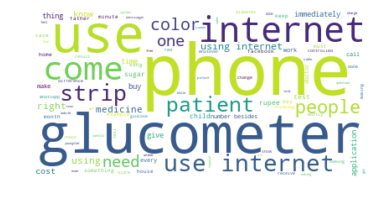

In [0]:
# Data of design/tools (__label__tool)
text = " ".join(review for review in tool['Data_clean'])

print(Counter(text.split()))
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)
tool_keywords=Counter(text.split())
tool_keywords=[i for i in tool_keywords if tool_keywords[i] > 5]
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()